In [1]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv('movies.csv')

In [3]:
movie.shape

(9742, 3)

In [4]:
ratings = pd.read_csv('ratings.csv')

In [5]:
ratings.shape

(100836, 4)

In [6]:
# How many unique "userId" are available in "ratings.csv"?

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratingsuniqueid=list(ratings['userId'].unique())

In [9]:
count = 0
for i in ratingsuniqueid:
    count+=1
print(count)

610


In [10]:
# Which movie has recieved maximum number of user ratings?

In [11]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
data_merged=pd.merge(ratings, movie, on='movieId', how='left')

In [14]:
data_merged

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [15]:
ratings_count = data_merged['movieId'].value_counts().reset_index()
ratings_count.columns = ['movieId', 'number_of_ratings']

In [16]:
ratings_count

,movieId,number_of_ratings
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
9719,86279,1
9720,86922,1
9721,5962,1
9722,87660,1


In [17]:
max_rated_movie = pd.merge(ratings_count, movie, on='movieId')
max_rated_movie = max_rated_movie.loc[max_rated_movie['number_of_ratings'].idxmax()]

In [18]:
max_rated_movie,max_rated_movie

(movieId                                   356
 number_of_ratings                         329
 title                     Forrest Gump (1994)
 genres               Comedy|Drama|Romance|War
 Name: 0, dtype: object,
 movieId                                   356
 number_of_ratings                         329
 title                     Forrest Gump (1994)
 genres               Comedy|Drama|Romance|War
 Name: 0, dtype: object)

In [19]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [20]:
tags = pd.read_csv('tags.csv')

In [21]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [22]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
matrix_movie_id = movie[movie['title'] == "Matrix, The (1999)"]['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

print(matrix_tags[['tag']])

                     tag
815         martial arts
816               sci-fi
1646  alternate universe
2794          philosophy
2795    post apocalyptic


In [24]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [25]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [26]:
terminatorid= movie[movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

In [33]:
terminatorRating = ratings[ratings['movieId'] == terminatorid]

In [34]:
avg = terminatorRating['rating'].mean()

In [35]:
terminatorid,avg

(589, 3.970982142857143)

In [36]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [37]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [38]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
fight_club = ratings[ratings['movieId'] == 6]

In [41]:
fight_club

,userId,movieId,rating,timestamp
2,1,6,4.0,964982224
564,6,6,4.0,845553757
1259,11,6,5.0,902154266
1774,18,6,4.0,1460138360
3781,23,6,4.0,1107342267
...,...,...,...,...
92626,599,6,4.5,1498539623
95966,602,6,3.0,840876055
96101,603,6,4.0,963177624
97046,604,6,3.0,832080355


NameError: name 'fight_club_ratings' is not defined

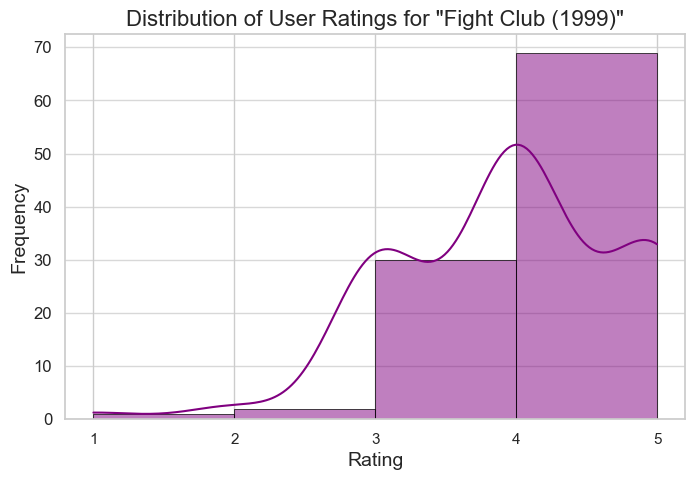

In [42]:
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.histplot(fight_club['rating'], bins=4, kde=True, color='purple', edgecolor='black', linewidth=0.5)
plt.title('Distribution of User Ratings for "Fight Club (1999)"', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([1, 2, 3, 4, 5])  
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.75)

max_rating = fight_club_ratings['rating'].max()
plt.annotate(f'Max Rating: {max_rating}', xy=(max_rating, 1), xytext=(max_rating+0.2, 2),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# 

In [43]:
grouped_ratings = ratings.groupby('movieId').agg(count=('rating', 'count'), mean_rating=('rating', 'mean')).reset_index()

new_data = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

filtered_movies = new_data[new_data['count'] > 50]

In [44]:
filtered_movies

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [45]:
most_popular_movie = filtered_movies.loc[filtered_movies['mean_rating'].idxmax()]
most_popular_movie

movieId                                     318
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
count                                       317
mean_rating                            4.429022
Name: 277, dtype: object

In [46]:
top_5_popmov = filtered_movies.sort_values(by='count', ascending=False).head(5)

In [47]:
top_5_popmov

,movieId,title,genres,count,mean_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [48]:
top_5_popmov[['title', 'count', 'mean_rating']]

,title,count,mean_rating
314,Forrest Gump (1994),329,4.164134
277,"Shawshank Redemption, The (1994)",317,4.429022
257,Pulp Fiction (1994),307,4.197068
510,"Silence of the Lambs, The (1991)",279,4.161290
1938,"Matrix, The (1999)",278,4.192446


In [49]:
data_Scifi = ratings.groupby('movieId').agg(count=('rating', 'count'), mean_rating=('rating', 'mean')).reset_index()

In [50]:
data_Scifi

,movieId,count,mean_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [51]:
mergedscifi = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

In [52]:
mergedscifi

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [53]:
filtered_movies = mergedscifi[mergedscifi['count'] > 50]
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

In [54]:
filtered_movies

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [55]:
sci_fi_movies

,movieId,title,genres,count,mean_rating
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [56]:
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)

In [57]:
sorted_sci_fi_movies

,movieId,title,genres,count,mean_rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [58]:
ans = sorted_sci_fi_movies.iloc[2]

In [59]:
ans

movieId                                     480
title                      Jurassic Park (1993)
genres         Action|Adventure|Sci-Fi|Thriller
count                                       238
mean_rating                                3.75
Name: 418, dtype: object

In [36]:
# links

In [60]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

In [61]:
links = pd.read_csv('links.csv')

In [62]:
movie_links = pd.merge(filtered_movies, links, on='movieId')

In [63]:
movie_links

,movieId,title,genres,count,mean_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [64]:
movie_links['title'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'GoldenEye (1995)',
       'American President, The (1995)', 'Casino (1995)',
       'Sense and Sensibility (1995)',
       'Ace Ventura: When Nature Calls (1995)', 'Get Shorty (1995)',
       'Leaving Las Vegas (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Babe (1995)',
       'Dead Man Walking (1995)', 'Clueless (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Pocahontas (1995)',
       'Usual Suspects, The (1995)', "Mr. Holland's Opus (1995)",
       'From Dusk Till Dawn (1996)', 'Broken Arrow (1996)',
       'Happy Gilmore (1996)', 'Braveheart (1995)', 'Taxi Driver (1976)',
       'Birdcage, The (1996)', 'Bad Boys (1995)', 'Apollo 13 (1995)',
       'Batman Forever (1995)', 'Casper (1995)', 'Congo (1995)',
       'Crimson Tide (1995)', 'Desperado (1995)',
       'Die Hard: With a Vengeance (1995)', 'First Knight (1995)',
       'Johnny Mnemonic (1995)', 'Ju

In [80]:
data = movie_links[['title','imdbId','tmdbId']]

In [81]:
data.to_csv('map.csv')

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [78]:
base_url = "https://www.imdb.com/title/tt"

def scrape_imdb_reviews(imdb_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9'
    }
    reviews = []
    try:
        response = requests.get(imdb_url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            review_elements = soup.find_all('div', class_='lister-item mode-detail imdb-user-review collapsable')
            for review in review_elements:
                title_element = review.find('a', class_='title')
                title = title_element.get_text(strip=True) if title_element else 'No title'
                
                rating_element = review.find('span', class_='rating-other-user-rating')
                rating_value = rating_element.find('span').get_text(strip=True) if rating_element else 'N/A'
                
                review_text_element = review.find('div', class_='text show-more__control')
                review_text = review_text_element.get_text(strip=True) if review_text_element else 'No review text'

                reviews.append({
                    'title': title,
                    'rating': rating_value,
                    'review_text': review_text
                })
        else:
            print(f"Request failed with status code {response.status_code} for URL: {imdb_url}")
    except Exception as e:
        print(f"Error occurred: {e}")
    
    return reviews

# Load movie data
movie_links = pd.DataFrame(data)
all_reviews = []

# Scrape reviews for each movie
for _, row in movie_links.iterrows():
    imdb_id = row['imdbId']
    imdb_id_str = str(imdb_id).zfill(7)
    imdb_url = f"{base_url}{imdb_id_str}/reviews/?ref_=tt_ov_rt"
    print(f"Scraping URL: {imdb_url}")
    reviews = scrape_imdb_reviews(imdb_url)
    if reviews:
        for review in reviews:
            all_reviews.append({
                'movie_title': row['title'],
                'review_title': review['title'],
                'rating': review['rating'],
                'review_text': review['review_text']
            })
    else:
        all_reviews.append({
            'movie_title': row['title'],
            'review_title': 'No reviews found',
            'rating': 'N/A',
            'review_text': 'No reviews found or class name may have changed.'
        })

# Convert to DataFrame and save as CSV
df_reviews = pd.DataFrame(all_reviews)
df_reviews.to_csv('imdb_reviews_all.csv', index=False)
print("Reviews have been saved to imdb_reviews_all.csv")


Scraping URL: https://www.imdb.com/title/tt0114709/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0113497/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0113228/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0113277/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0114319/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0113189/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0112346/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0112641/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0114388/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0112281/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0113161/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0113627/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0114746/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/tit

Scraping URL: https://www.imdb.com/title/tt0057012/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0117951/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0116629/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0115798/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0116213/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0117218/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0068646/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0052357/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0047396/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0053125/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0034583/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0032138/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0033467/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/tit

Scraping URL: https://www.imdb.com/title/tt0099088/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0120815/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0097523/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0061852/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0048280/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0097757/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0088161/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0087469/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0120611/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0094721/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0094226/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0104257/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0099487/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/tit

Scraping URL: https://www.imdb.com/title/tt0268380/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0259446/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0145487/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0121765/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0258463/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0181689/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0120912/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0295178/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0286106/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0245429/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0310793/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0295297/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/title/tt0167261/reviews/?ref_=tt_ov_rt
Scraping URL: https://www.imdb.com/tit

In [66]:
movie_links

,movieId,title,genres,count,mean_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [67]:
import pandas as pd

In [68]:
scrapped_data = pd.read_csv("imdb_reviews_all.csv")

In [3]:
scrapped_data

,movie_title,review_title,rating,review_text
0,Toy Story (1995),"Created a decade ago, but still stunning",9.0,I am a big fan of the animated movies coming f...
1,Toy Story (1995),Plastic Fantastic.,9.0,"Y'know, I always suspected that my toys were c..."
2,Toy Story (1995),Proof that Pixar not only cares about the qual...,9.0,Though I am not a big fan of computer animatio...
3,Toy Story (1995),Technically impressive with great script and s...,NaN,Andy's toys live a reasonable life of fun and ...
4,Toy Story (1995),"Excellent Viewing, Every Time!",10.0,This is a very clever animated story that was ...
...,...,...,...,...
8614,Deadpool (2016),"""I'm touching myself tonight.""",7.0,Deadpool is directed by Tim Miller and stars R...
8615,Deadpool (2016),Love it!,9.0,Deadpool is such a great part of the X-Men fra...
8616,Deadpool (2016),A new landmark for superhero and comedy films,9.0,"With a brilliant script, visceral action, and ..."
8617,Deadpool (2016),Overated,6.0,Still don't get the hype for this.I'm sorry bu...


In [4]:
scrapped_data[scrapped_data['movie_title'] == 'Toy Story (1995)']

,movie_title,review_title,rating,review_text
0,Toy Story (1995),"Created a decade ago, but still stunning",9.0,I am a big fan of the animated movies coming f...
1,Toy Story (1995),Plastic Fantastic.,9.0,"Y'know, I always suspected that my toys were c..."
2,Toy Story (1995),Proof that Pixar not only cares about the qual...,9.0,Though I am not a big fan of computer animatio...
3,Toy Story (1995),Technically impressive with great script and s...,NaN,Andy's toys live a reasonable life of fun and ...
4,Toy Story (1995),"Excellent Viewing, Every Time!",10.0,This is a very clever animated story that was ...
5,Toy Story (1995),Witty Sweet Fun For All Ages. Forever Changed ...,10.0,This is as close to perfection as any animated...
6,Toy Story (1995),One of the Best Animated Films Ever!,10.0,Toy Story is a sheer delight to view on the sc...
7,Toy Story (1995),Best Disney film. Ever.,10.0,Toy Story is not only the best Disney film bec...
8,Toy Story (1995),Entertaining adventure,7.0,"Rollicking, entertaining adventure. Good fun, ..."
9,Toy Story (1995),Toy Story: Thoroughly Entertaining,7.0,With the ever increasing proximity of Toy Stor...


In [5]:
scrapped_data['rating'].dropna(inplace=True)

In [6]:
scrapped_data

,movie_title,review_title,rating,review_text
0,Toy Story (1995),"Created a decade ago, but still stunning",9.0,I am a big fan of the animated movies coming f...
1,Toy Story (1995),Plastic Fantastic.,9.0,"Y'know, I always suspected that my toys were c..."
2,Toy Story (1995),Proof that Pixar not only cares about the qual...,9.0,Though I am not a big fan of computer animatio...
3,Toy Story (1995),Technically impressive with great script and s...,NaN,Andy's toys live a reasonable life of fun and ...
4,Toy Story (1995),"Excellent Viewing, Every Time!",10.0,This is a very clever animated story that was ...
...,...,...,...,...
8614,Deadpool (2016),"""I'm touching myself tonight.""",7.0,Deadpool is directed by Tim Miller and stars R...
8615,Deadpool (2016),Love it!,9.0,Deadpool is such a great part of the X-Men fra...
8616,Deadpool (2016),A new landmark for superhero and comedy films,9.0,"With a brilliant script, visceral action, and ..."
8617,Deadpool (2016),Overated,6.0,Still don't get the hype for this.I'm sorry bu...


In [ ]:
a=pd.read_csv("map.csv")

async def fetch_imdb_rating(session, imdb_id):
    id = str(int(imdb_id))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    url = f"https://www.imdb.com/title/tt{new_id}/"
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'My Cool Movie Rating App (+your website here)',  # Consider a more generic user-agent
        'Accept-Encoding': 'gzip, deflate, br'
    }

    retries = 10
    for attempt in range(retries):
        try:
            async with session.get(url, headers=headers) as response:
                if response.status == 200:
                    html_content = await response.text()
                    soup = BeautifulSoup(html_content, 'html.parser')
                    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
                    return imdb_rating.text if imdb_rating else None
                else:
                    return None
        except (aiohttp.ClientError, aiohttp.ClientConnectionError):
            print(f"Attempt {attempt + 1}/{retries}: Connection error. Retrying...")
            await asyncio.sleep(5) 

    return None


async def loop_data_async(imdb_ids):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_imdb_rating(session, imdb_id) for imdb_id in imdb_ids]
        imdb_ratings = await asyncio.gather(*tasks)
        for i, rating in enumerate(imdb_ratings):
            if rating and (i + 1) % 10 == 0: 
                print(f"Scraped rating for movie {i + 1}: {rating}")
        return imdb_ratings


def scrap():
    imdb_ids = a["imdbId"]
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)
    try:
        return loop.run_until_complete(loop_data_async(imdb_ids))
    finally:
        loop.close()


a["Imdb_ratings"] = scrap()
a.to_csv('ratingscrapped.csv')

In [75]:
# Mention the movieId of the movie which has the highest IMDB rating.

In [84]:
data = pd.read_csv('ratingscrapped.csv')

In [85]:
data

,Unnamed: 0.1,Unnamed: 0,movieId,imdbId,tmdbId,Imdb_ratings
0,0,0,1,114709,862.0,8.3
1,1,1,2,113497,8844.0,7.1
2,2,2,3,113228,15602.0,6.7
3,3,5,6,113277,949.0,8.3
4,4,6,7,114319,11860.0,6.3
...,...,...,...,...,...,...
431,431,8305,106782,993846,106646.0,8.2
432,432,8372,109374,2278388,120467.0,8.1
433,433,8376,109487,816692,157336.0,8.7
434,434,8475,112852,2015381,118340.0,8.0


In [86]:
data[data['Imdb_ratings']==data['Imdb_ratings'].max()]

,Unnamed: 0.1,Unnamed: 0,movieId,imdbId,tmdbId,Imdb_ratings
53,53,277,318,111161,278.0,9.3


In [91]:
# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [110]:
movie['genres'] = movie['genres'].str.split('|')
data_exploded = movie.explode('genres').reset_index(drop=True)


,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy
22080,193585,Flint (2017),Drama
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [113]:
data= data_exploded[data_exploded['genres']=='Sci-Fi']

In [114]:
data

,movieId,title,genres
60,24,Powder (1995),Sci-Fi
72,29,"City of Lost Children, The (Cité des enfants p...",Sci-Fi
77,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Sci-Fi
138,66,Lawnmower Man 2: Beyond Cyberspace (1996),Sci-Fi
157,76,Screamers (1995),Sci-Fi
...,...,...,...
22027,188301,Ant-Man and the Wasp (2018),Sci-Fi
22046,189547,Iron Soldier (2010),Sci-Fi
22050,190183,The Darkest Minds (2018),Sci-Fi
22062,191005,Gintama (2017),Sci-Fi


In [116]:
a = data['movieId'].tolist()

In [117]:
a

[24,
 29,
 32,
 66,
 76,
 103,
 160,
 172,
 173,
 196,
 198,
 208,
 256,
 260,
 273,
 292,
 316,
 327,
 329,
 332,
 338,
 379,
 426,
 435,
 442,
 480,
 504,
 512,
 519,
 541,
 546,
 589,
 610,
 611,
 671,
 673,
 674,
 680,
 692,
 718,
 737,
 741,
 748,
 780,
 788,
 849,
 880,
 924,
 968,
 1019,
 1037,
 1077,
 1097,
 1127,
 1129,
 1196,
 1199,
 1200,
 1206,
 1210,
 1214,
 1223,
 1232,
 1240,
 1253,
 1255,
 1270,
 1274,
 1301,
 1306,
 1320,
 1334,
 1340,
 1356,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1391,
 1396,
 1479,
 1527,
 1544,
 1580,
 1584,
 1590,
 1591,
 1603,
 1646,
 1653,
 1676,
 1682,
 1690,
 1726,
 1748,
 1762,
 1779,
 1831,
 1862,
 1876,
 1882,
 1909,
 1917,
 1921,
 1924,
 1965,
 2009,
 2010,
 2011,
 2012,
 2021,
 2034,
 2038,
 2046,
 2053,
 2054,
 2091,
 2094,
 2105,
 2117,
 2134,
 2136,
 2232,
 2256,
 2275,
 2287,
 2288,
 2311,
 2322,
 2346,
 2363,
 2364,
 2365,
 2367,
 2368,
 2377,
 2393,
 2407,
 2408,
 2428,
 2448,
 2450,
 2454,
 2455,
 2456,
 2495,
 2498,
 2525,
 252

In [118]:
b=set(a)
b

{24,
 29,
 32,
 66,
 76,
 103,
 160,
 172,
 173,
 196,
 198,
 208,
 256,
 260,
 273,
 292,
 316,
 327,
 329,
 332,
 338,
 379,
 426,
 435,
 442,
 480,
 504,
 512,
 519,
 541,
 546,
 589,
 610,
 611,
 671,
 673,
 674,
 680,
 692,
 718,
 737,
 741,
 748,
 780,
 788,
 849,
 880,
 924,
 968,
 1019,
 1037,
 1077,
 1097,
 1127,
 1129,
 1196,
 1199,
 1200,
 1206,
 1210,
 1214,
 1223,
 1232,
 1240,
 1253,
 1255,
 1270,
 1274,
 1301,
 1306,
 1320,
 1334,
 1340,
 1356,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1391,
 1396,
 1479,
 1527,
 1544,
 1580,
 1584,
 1590,
 1591,
 1603,
 1646,
 1653,
 1676,
 1682,
 1690,
 1726,
 1748,
 1762,
 1779,
 1831,
 1862,
 1876,
 1882,
 1909,
 1917,
 1921,
 1924,
 1965,
 2009,
 2010,
 2011,
 2012,
 2021,
 2034,
 2038,
 2046,
 2053,
 2054,
 2091,
 2094,
 2105,
 2117,
 2134,
 2136,
 2232,
 2256,
 2275,
 2287,
 2288,
 2311,
 2322,
 2346,
 2363,
 2364,
 2365,
 2367,
 2368,
 2377,
 2393,
 2407,
 2408,
 2428,
 2448,
 2450,
 2454,
 2455,
 2456,
 2495,
 2498,
 2525,
 252

In [124]:
data1=links[links['movieId'].isin(b)]

In [125]:
data1

,movieId,imdbId,tmdbId
23,24,114168,12665.0
28,29,112682,902.0
31,32,114746,63.0
59,66,116839,11525.0
68,76,114367,9102.0
...,...,...,...
9713,188301,5095030,363088.0
9722,189547,1665744,111196.0
9724,190183,4073790,445651.0
9731,191005,5805470,432985.0


In [127]:
data1.to_csv('Sci-fi.csv')

In [ ]:
a=pd.read_csv("SCI-FI.csv")

async def fetch_imdb_rating(session, imdb_id):
    id = str(int(imdb_id))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    url = f"https://www.imdb.com/title/tt{new_id}/"
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'My Cool Movie Rating App (+your website here)',  # Consider a more generic user-agent
        'Accept-Encoding': 'gzip, deflate, br'
    }

    retries = 10
    for attempt in range(retries):
        try:
            async with session.get(url, headers=headers) as response:
                if response.status == 200:
                    html_content = await response.text()
                    soup = BeautifulSoup(html_content, 'html.parser')
                    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
                    return imdb_rating.text if imdb_rating else None
                else:
                    return None
        except (aiohttp.ClientError, aiohttp.ClientConnectionError):
            print(f"Attempt {attempt + 1}/{retries}: Connection error. Retrying...")
            await asyncio.sleep(5) 

    return None


async def loop_data_async(imdb_ids):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_imdb_rating(session, imdb_id) for imdb_id in imdb_ids]
        imdb_ratings = await asyncio.gather(*tasks)
        for i, rating in enumerate(imdb_ratings):
            if rating and (i + 1) % 10 == 0: 
                print(f"Scraped rating for movie {i + 1}: {rating}")
        return imdb_ratings


def scrap():
    imdb_ids = a["imdbId"]
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)
    try:
        return loop.run_until_complete(loop_data_async(imdb_ids))
    finally:
        loop.close()


a["Imdb_ratings"] = scrap()
a.to_csv('Final.csv')

In [128]:
final = pd.read_csv('Final.csv')

In [129]:
final

,Unnamed: 0.1,Unnamed: 0,movieId,imdbId,tmdbId,Imdb_ratings
0,0,23,24,114168,12665.0,6.6
1,1,28,29,112682,902.0,7.5
2,2,31,32,114746,63.0,8.0
3,3,59,66,116839,11525.0,2.6
4,4,68,76,114367,9102.0,6.3
...,...,...,...,...,...,...
975,975,9713,188301,5095030,363088.0,7.0
976,976,9722,189547,1665744,111196.0,1.5
977,977,9724,190183,4073790,445651.0,5.7
978,978,9731,191005,5805470,432985.0,6.1


In [131]:
max_rating = final['Imdb_ratings'].max()

max_rating_movie = final[final['Imdb_ratings'] == max_rating]

print("Movie with the highest IMDb rating:")
print(max_rating_movie)


Movie with the highest IMDb rating:
     Unnamed: 0.1  Unnamed: 0  movieId   imdbId    tmdbId  Imdb_ratings
784           784        8301   106642  2779318  253941.0           9.3


# Movie Name : https://www.imdb.com/title/tt2779318/

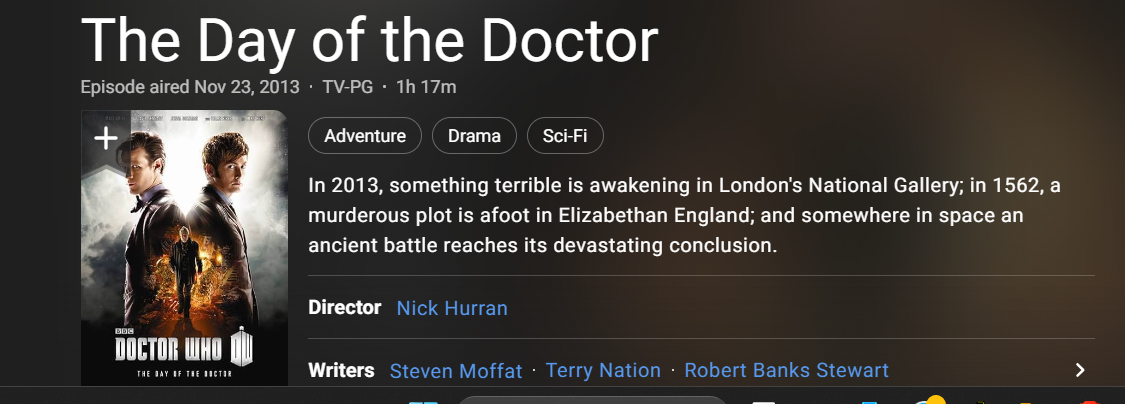

In [ ]:
# End